Conduction Load: 4212.00 W
Solar Load: 1400.00 W
People Load: 200.00 W
Appliance Load: 500.00 W
Ventilation Load: 1567.80 W
Total Cooling Load: 7879.80 W (2.24 TR)


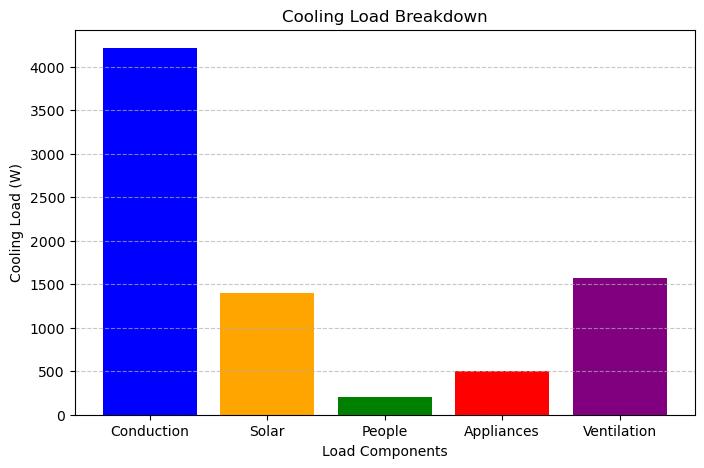

Selected Material: Brick
Optimal Insulation Thickness: 0.50 m
Cooling Load with Optimal Insulation: 1684.80 W


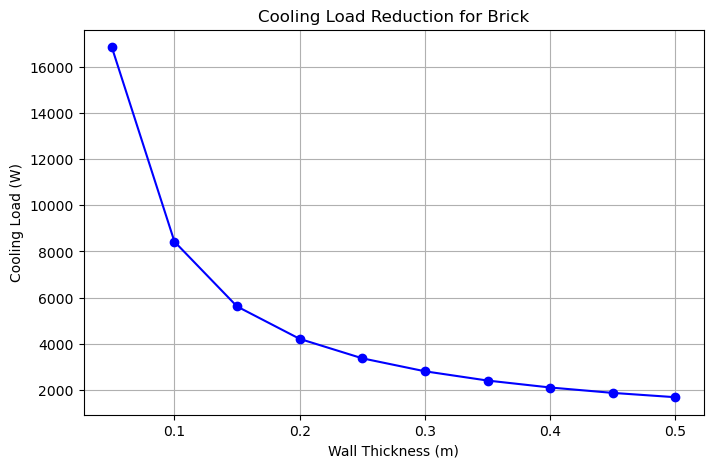

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Cp_air = 1.005  # Specific heat capacity of air (kJ/kg·K)
density_air = 1.2  # kg/m³ at standard conditions

# Room Properties
room_length = 5  # meters
room_width = 4  # meters
room_height = 3  # meters
indoor_temp = 22  # °C
outdoor_temp = 35  # °C
ventilation_airflow = 0.1  # m³/s (fresh air intake)

# Wall Properties
wall_area = 2 * room_height * (room_length + room_width)  # m²
wall_thickness = 0.2  # meters
wall_conductivity = 1.2  # W/m·K (brick wall)

# Window Properties
window_area = 4  # m²
glass_solar_heat_gain_coefficient = 0.7  # SHGC
solar_radiation = 500  # W/m² (depends on location & time)

# Internal Gains
num_people = 2

heat_per_person = 100  # W (sensible heat)
appliance_power = 500  # W (lights, computers, etc.)

# Conduction Heat Transfer (Q = k*A*dT/d)
Q_conduction = (wall_conductivity * wall_area * (outdoor_temp - indoor_temp)) / wall_thickness  # Watts

# Solar Heat Gain through Windows
Q_solar = window_area * glass_solar_heat_gain_coefficient * solar_radiation  # Watts

# Internal Heat Gains
Q_people = num_people * heat_per_person  # Watts
Q_appliances = appliance_power  # Watts

# Ventilation Load (Q = m*Cp*dT, where m = density * airflow)
mass_flow_rate = density_air * ventilation_airflow  # kg/s
Q_ventilation = mass_flow_rate * Cp_air * (outdoor_temp - indoor_temp) * 1000  # Convert kW to W

# Total Cooling Load
Q_total = Q_conduction + Q_solar + Q_people + Q_appliances + Q_ventilation  # Watts
Q_total_TR = Q_total / 3517  # Convert Watts to Tons of Refrigeration (TR)

# Display Results
print(f"Conduction Load: {Q_conduction:.2f} W")
print(f"Solar Load: {Q_solar:.2f} W")
print(f"People Load: {Q_people:.2f} W")
print(f"Appliance Load: {Q_appliances:.2f} W")
print(f"Ventilation Load: {Q_ventilation:.2f} W")
print(f"Total Cooling Load: {Q_total:.2f} W ({Q_total_TR:.2f} TR)")

# Plot Load Contribution
categories = ['Conduction', 'Solar', 'People', 'Appliances', 'Ventilation']
values = [Q_conduction, Q_solar, Q_people, Q_appliances, Q_ventilation]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Load Components")
plt.ylabel("Cooling Load (W)")
plt.title("Cooling Load Breakdown")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Wall material properties (Thermal Conductivity in W/mK)
materials = {
    "Brick": 1.2,
    "Concrete": 1.6,
    "Wood": 0.15,
    "Insulated Panel": 0.035
}

# Function to calculate cooling load for different materials and thicknesses
def calculate_cooling_load(material, thickness):
    k = materials[material]  # Thermal conductivity
    Q_conduction = (k * wall_area * (outdoor_temp - indoor_temp)) / thickness  # Watts
    return Q_conduction

# User selects material
selected_material = "Brick"  # Change this to test different materials
thickness_range = np.linspace(0.05, 0.5, 10)  # Thickness from 5cm to 50cm
cooling_loads = [calculate_cooling_load(selected_material, t) for t in thickness_range]

# Find optimal thickness
optimal_thickness = thickness_range[np.argmin(cooling_loads)]
optimal_load = min(cooling_loads)

# Display results
print(f"Selected Material: {selected_material}")
print(f"Optimal Insulation Thickness: {optimal_thickness:.2f} m")
print(f"Cooling Load with Optimal Insulation: {optimal_load:.2f} W")

# Plot Cooling Load vs. Wall Thickness
plt.figure(figsize=(8, 5))
plt.plot(thickness_range, cooling_loads, marker='o', linestyle='-', color='b')
plt.xlabel("Wall Thickness (m)")
plt.ylabel("Cooling Load (W)")
plt.title(f"Cooling Load Reduction for {selected_material}")
plt.grid()
plt.show()
